In [116]:
import networkx as nx
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
CSS_graph = nx.read_graphml('my_data/CSS_graph.graphml')

In [63]:
def get_matching_att(graph, att):
    match_frac = {}
    for node in graph.nodes:
        counter = 0
        neighbors = len(list(graph.neighbors(node)))

        if neighbors == 0: match_frac[node] = 0

        else:
            for neighbor in graph.neighbors(node):
                if nx.get_node_attributes(graph, att)[neighbor] == nx.get_node_attributes(graph, att)[node]:
                    counter += 1

            match_frac[node] = counter / neighbors

    return match_frac

In [36]:
top_field_fracs = get_matching_att(CSS_graph, 'att2')

100%|██████████| 10727/10727 [02:27<00:00, 72.97it/s] 


#### 1.2 Shuffle the top fields

In [37]:
CSS_graph_copy = nx.read_graphml('my_data/CSS_graph.graphml')

In [55]:
def shuffle_node_att(graph, att):
    shuffled_atts = nx.get_node_attributes(graph, att)
    temp = list(shuffled_atts.values())
    random.shuffle(temp)
    new_atts = dict(zip(shuffled_atts, temp))

    return new_atts

In [60]:
#Shuffle the top fields:
nx.set_node_attributes(CSS_graph_copy, shuffle_node_att(CSS_graph, 'att2'), 'att2')

In [87]:
def sim_matching_atts(graph, att, N, copy):
    sim_matrix = []
    for i in tqdm(range(N)):
        nx.set_node_attributes(copy, shuffle_node_att(graph, att), att)
        sim_matrix.append(list(get_matching_att(copy, att).values()))
    return sim_matrix

In [88]:
# Simulate 100 graphs with random fields
sim_matrix = sim_matching_atts(CSS_graph, 'att2', 5, CSS_graph_copy)

100%|██████████| 5/5 [12:36<00:00, 151.34s/it]


(array([196.81068022, 196.81068022,   0.        ,   0.        ,
        196.81068022,   0.        ,   0.        ,   0.        ,
          0.        , 393.62136043]),
 array([0.27560534, 0.27662155, 0.27763775, 0.27865396, 0.27967016,
        0.28068637, 0.28170257, 0.28271878, 0.28373498, 0.28475119,
        0.28576739]),
 <BarContainer object of 10 artists>)

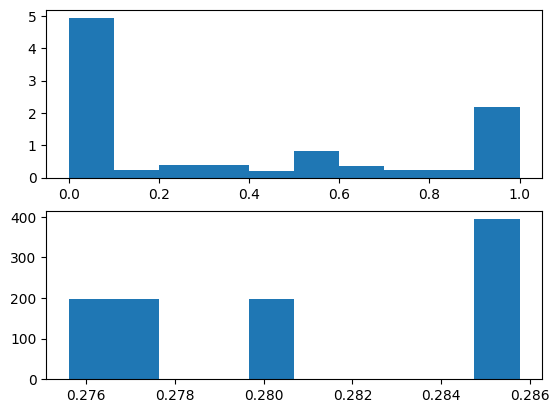

In [97]:
#plot distribution for real and sim graphs
sim_vector = list(np.concatenate(sim_matrix).flat)
figure, ax = plt.subplots(2)
bins = 10

ax[0].hist(top_field_fracs.values(), density=True, bins = bins)
ax[1].hist(sim_vector, density=True, bins = bins)

#### 1.4 Compute the assortativity coefficient for the network, with respect to author field

In [122]:
E = {}
list_of_fields =list(set(nx.get_node_attributes(CSS_graph, 'att2').values()))

for field in list_of_fields:
    E[field] = {}

for node in tqdm(CSS_graph.nodes):
    node_field = nx.get_node_attributes(CSS_graph, 'att2')[node]

    for neighbor in nx.neighbors(CSS_graph, node):
        neighbor_field = nx.get_node_attributes(CSS_graph, 'att2')[neighbor]

        try:
            E[node_field][neighbor_field] +=1
        except:
            E[node_field][neighbor_field] = 1

for field in list_of_fields:
    for field2 in list_of_fields:
        try:
            E[field][field2] = E[field][field2]/(2 * CSS_graph.number_of_edges())
        except:
            E[field][field2] = 0

100%|██████████| 22/22 [00:00<00:00, 39.73it/s]


In [124]:
E

{'Philosophy': {'Computer Science': 0.0009067033516758379,
  'Economics': 0.0002813906953476738,
  'Psychology': 9.379689844922461e-05,
  'Business': 0.00018759379689844922,
  'Biology': 6.25312656328164e-05,
  'Mathematics': 3.12656328164082e-05,
  'Sociology': 9.379689844922461e-05,
  'Medicine': 0.0001250625312656328,
  'Political Science': 6.25312656328164e-05,
  'Physics': 3.12656328164082e-05,
  'Education': 3.12656328164082e-05,
  'Art': 3.12656328164082e-05,
  'Chemistry': 3.12656328164082e-05,
  'Philosophy': 0,
  'Geology': 0,
  'Materials Science': 0,
  'Agricultural And Food Sciences': 0,
  'History': 0,
  'Engineering': 0,
  'Linguistics': 0,
  'Law': 0,
  'Environmental Science': 0},
 'Economics': {'Computer Science': 0.06697098549274637,
  'Biology': 0.001532016008004002,
  'Psychology': 0.004439719859929965,
  'Political Science': 0.003157828914457229,
  'Economics': 0.04370935467733867,
  'Education': 0.0010317658829414708,
  'Geology': 9.379689844922461e-05,
  'Sociol

In [131]:
#Check of the E matrix to see if it upholds that sum(e_{i,j}) = 1
# And make the dict to a matrix
s = 0
matrix_E = []
for field in list_of_fields:
    matrix_E.append(list(E[field].values()))
    for field2 in E[field].keys():
        s += E[field][field2]
s

100%|██████████| 22/22 [00:00<00:00, 21970.16it/s]


1.000000000000002

In [126]:
A = B = [val for field in list_of_fields for val in E[field].values()]

In [140]:
assortative_coefficient = (sum(np.diagonal(matrix_E)) - sum(np.array(A) * np.array(B))) / (1 - sum(np.array(A) * np.array(B)))
assortative_coefficient

-0.15774484986802267

In [139]:
nx.attribute_assortativity_coefficient(CSS_graph, 'att2')

0.19011838960820351